# Descriptive Statistics
Deskriptif - kita mau merangkum data dengan angka statistik

## population vs sample
### population adalah keseluruhan data yang berkaitan denga yang kita cari
misalkan kita mau cari tau berapa rata rata berat badan orang Indonesia, berarti, population
adalah seluruh orang Indonesia, bayi sampe kakek, Jakarta, sabang, sorong, luar negri, wanita dan pria,
dan semua semuanya asalkan orang Indonesia. kalau kita dapat seluruh data ini, barulah dinamakan kita punya
data populasi Indonesia.

### sample
sample adalah sebagian dari populasi. contoh sample untuk orang Indonesia, kita ambil beberapa orang saja
dari setiap kategori yang ada, misalakan: setiap umur 5 orang, setiap gender 5 orang, setiap lokasi2 propinsi berbeda 5 orang, total total ada 500 orang maka ini adalah sample data orang Indonesia.
   
kalau tidak diambil dari setiap kategori, data kita kurang tepat, data kita jadinya bukan orang Indonesia, tapi jadi
data lain, misalkan hanya data "wanita Indonesia di kampus untar di Jakarta" kalau data cuman kita survey dari kampus
untar dan cuma wanita saja.

* sebagai data scientist, saat diberikan data, atau statement tentang data, kita bisa bertanya datanya darimana,
population, atau sample

## outlier
data yang berbeda sendiri, jauh bedanya dari data yang lain
- natural
- salah input
- karena sendang kita observasi, sistem jadi berubah

## central tendency
seberapa ke "tengah" datanya, "tengah" datanya dimana sih?
- rata-rata (mean)
- median
    - angka tengah
    - dari data kita, yang bersifat numerik
    - urutkan dari kecil ke besar
    - lihat angka yang ada di tengah itu berapa
    - kalau angka tengah ada dua, maka kita jumlahkan dan bagi dua untuk dapat median
    - kalau angka tengah ada satu, maka itu angka median
    - dari data kita, 50% data ada di atas median, 50% data ada di bawah median
    - rumah di Jakarta mediannya 500juta, 50% rumah di Jakarta harganya diatas 500jt, dan 50% di bawah 500jt
- mode
    - angka yang paling sering muncul
    - contoh misal data nilai kelas [1,1,2,2,2,2,2,5,5,7,10]
    - mode adalah 2

## spread
seberapa tersebar datanya dari tengah
- standard deviation
    - variance = stddev ** 2
    - variance dihitung dengan menjumlahkan perbedaan jarak antara setiap titik data dengan rata-rata keseluruhan data. misalkan ada 100 orang yang kita timbang berat badannya untuk dapat rata-rata di 50kg, maka kita cari perbedaan berat badan orang pertama dengan 50kg + orang kedua dengan 50kg + orang ketiga dengan 50kg .... + orang ke-100 dengan 50kg
    - gimana kalau orangnya 40kg, berarti perbedaannya -10kg --> di kuadrat jadi 100
    - gimana kalau orangnya 60kg, berarti perbedaannya +10kg --> di kuadrat jadi 100
    - total perbedaan kedua orang ini jadi 0 dong..? kita jadi tidak bisa dapat total perbedaan antara setiap orang dengan rata2... jadi para matematik yang membuat formula ini menentukan baiknya perbedaannya semua di kuadrat saja, jadi semuanya angka positif. sudah ditambah semua baru kita akar lagi.
    - std dev dihitung dengan mengkar variance
- range (perbedaan angka max dan min)
- quartile dan percentile
    - quartile 1 2 3 adalah percentile ke 25,50,75
    - quartile 2 = percentile 50 = median
    - misalkan data harga rumah jakarta Q1 250jt, Q2 500jt, Q3 20milyar

## correlation
dua set data ini apakah ada hubungannya?
- kalau ada, apakah positif, negatif?
- dihitung menggunakan correlation coefficient r
- r nilai nya ada di antara -1 dan 1 
- r = 0 artinya tidak ada korelasi antara dua set data ini
- r = 1 artinya ada korelasi positif yang kuat antara dua set data ini
- r = -1 artinya ada korelasi negatif yang kuat antara dua set data ini

semakin r mendekati 0 semakin lemah korelasi antara dua set data

In [1]:
import numpy as np
import pandas as pd

import scipy.stats
import math
import statistics

In [2]:

df_can = pd.read_excel("dataset/Canada.xlsx",
            sheet_name="Canada by Citizenship",
            skiprows=20,
            skipfooter=2)

df_can = df_can.drop(columns=['Type', 'Coverage',   'AREA', 'AreaName',      'REG',
        'RegName',      'DEV',  'DevName'])
df_can = df_can.rename(columns={"OdName":"Country"})
df_can = df_can.set_index("Country")

# df_can

df_indo = df_can.loc[["Indonesia"]].T
df_indo

Country,Indonesia
1980,186
1981,178
1982,252
1983,115
1984,123
1985,100
1986,127
1987,213
1988,270
1989,260


In [3]:
# mean median mode untuk total imigrasi Indonesia
print(df_indo.mean())

Country
Indonesia    386.764706
dtype: float64


In [4]:
print(df_indo.median())

Country
Indonesia    266.0
dtype: float64


In [5]:
print(df_indo.mode())

Country  Indonesia
0              252


In [6]:
np.array(df_indo).mean()

386.7647058823529

In [7]:
# std dev, variance, range, quartile, percentile
print("std dev")
df_indo.std()

std dev


Country
Indonesia    251.233449
dtype: float64

In [8]:
df_indo.std(ddof=0) # kalau data population

Country
Indonesia    247.511266
dtype: float64

In [9]:
df_indo.std(ddof=1) # kalau data sample

Country
Indonesia    251.233449
dtype: float64

In [10]:
# variance, range, quartile, percentile
print("variance")
df_indo.var()

variance


Country
Indonesia    63118.245989
dtype: float64

In [11]:
# range, quartile, percentile
print("range")
print(df_indo.max() - df_indo.min())

range
Country
Indonesia    1038
dtype: int64


In [12]:
# quartile, percentile
df_indo.quantile([0.25,0.50,0.75])

Country,Indonesia
0.25,207.00
0.50,266.00
0.75,545.25


In [13]:
df_indo.describe()

Country,Indonesia
count,34.000000
mean,386.764706
std,251.233449
min,100.000000
25%,207.000000
50%,266.000000
75%,545.250000
max,1138.000000


0.94316189731992


<AxesSubplot:xlabel='India', ylabel='China'>

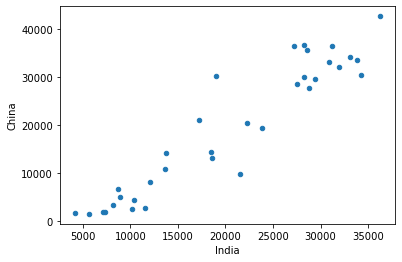

In [23]:
# correlation
# misal kita mau cara korelasi antara jumlah imigran yang dikirim China dan India ke Canada
df_india_china = df_can.loc[["India", "China"]].T

print(df_india_china["India"].corr(df_india_china["China"]))
df_india_china.plot(kind="scatter", x="India", y="China")

In [16]:
# angka korelasi 0.94 mendekati 1 artinya korelasi antara jumlah imigran yang dikirim India dan China
# punya korelasi positif yang kuat "strong positive correlation"
# r mendekati 1

r antara Indonesia dan Singapore
0.23829882620353515


<AxesSubplot:xlabel='Indonesia', ylabel='Singapore'>

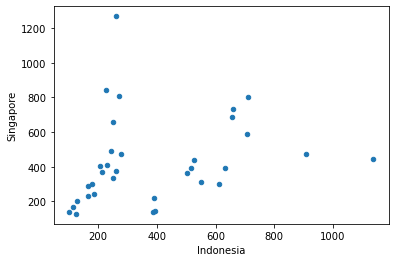

In [22]:

# misal kita mau cara korelasi antara jumlah imigran yang dikirim Singapore dan Indonesia ke Canada
df = df_can.loc[["Indonesia", "Singapore"]].T

print("r antara Indonesia dan Singapore")
print(df["Indonesia"].corr(df["Singapore"]))

df.plot(kind="scatter", x="Indonesia", y="Singapore")

r antara Malaysia dan Singapore
0.771549664108142


<AxesSubplot:xlabel='Malaysia', ylabel='Singapore'>

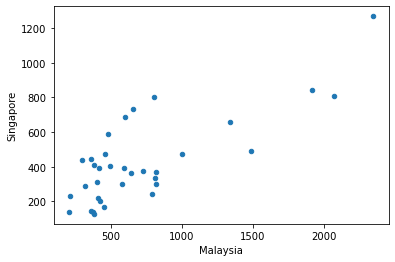

In [24]:
# misal kita mau cara korelasi antara jumlah imigran yang dikirim Singapore dan Malaysia ke Canada
df = df_can.loc[["Malaysia", "Singapore"]].T

print("r antara Malaysia dan Singapore")
print(df["Malaysia"].corr(df["Singapore"]))

df.plot(kind="scatter", x="Malaysia", y="Singapore")